<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Data_Visualization_matplotlib_pyplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load the seaborn data set diamonds
df = sns.load_dataset('diamonds')

In [5]:
df.shape

(53940, 10)

In [7]:
#Get a fraction of this data
df = df.sample(frac = .10, random_state = 33)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
47741,0.70,Premium,F,SI2,62.0,58.0,1890,5.70,5.64,3.52
46368,0.54,Premium,G,VS1,61.1,60.0,1760,5.28,5.23,3.21
35288,0.30,Very Good,H,VS2,60.9,61.0,473,4.32,4.35,2.64
44106,0.60,Very Good,H,VS2,60.8,60.0,1557,5.39,5.44,3.29
31088,0.33,Very Good,G,VVS2,60.0,63.0,752,4.45,4.49,2.68


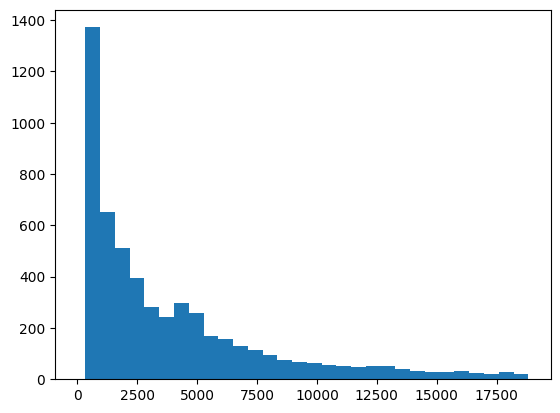

In [18]:
#Plot a hostogram to identify any outliers.
plt.hist(df['price'],bins=30)
plt.show()
plt.hist(df['carat'],bins=30)
plt.show()

In [21]:
premium = df.query("cut == 'Premium'" )['price']
ideal = df.query("cut == 'Ideal'")['price']

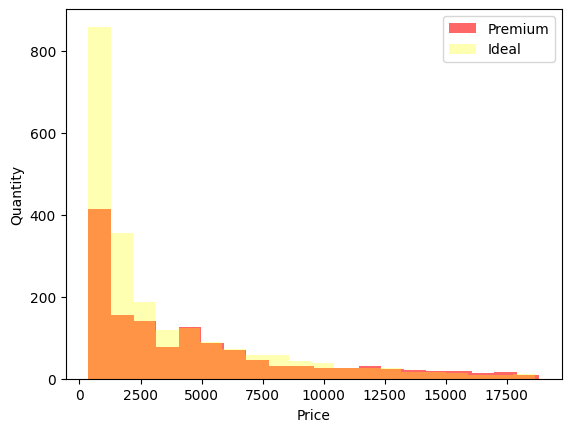

In [34]:
plt.hist(premium,bins=20,color = 'red',alpha = 0.6,label='Premium')
plt.hist(ideal,bins=20,color = 'yellow', alpha=0.3, label='Ideal')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.legend()
plt.show()

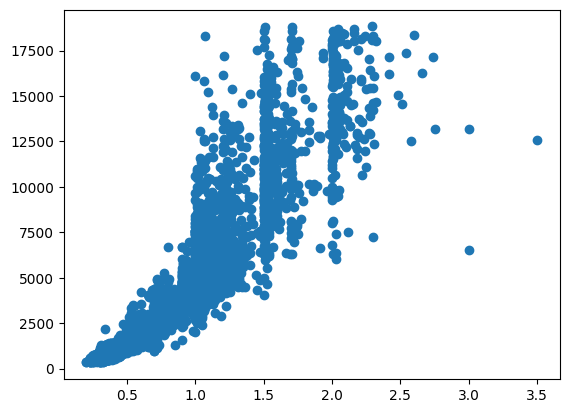

In [36]:
plt.scatter(df['carat'],df['price'])
plt.show()

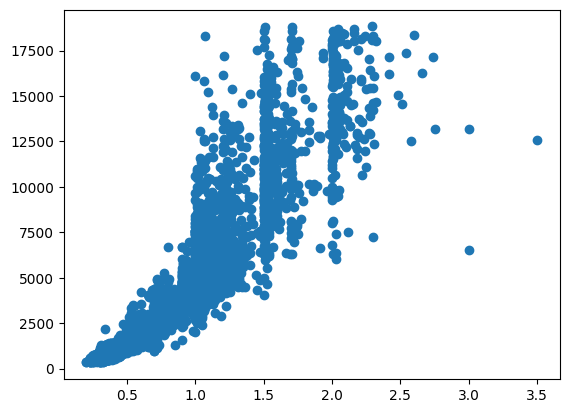

In [37]:
plt.scatter('carat','price', data=df)
plt.show()

In [38]:
df1 = df.sample(200,random_state = 33)

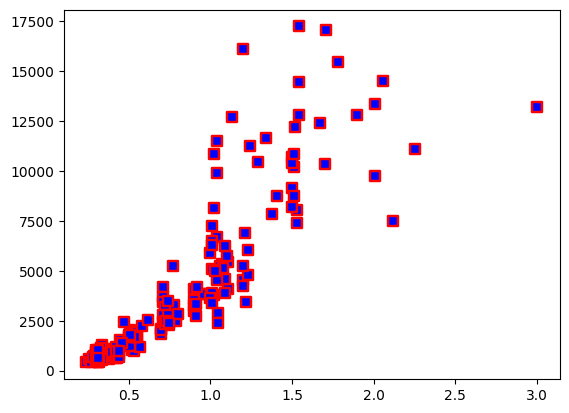

In [53]:
plt.scatter('carat','price',data = df1,color='blue',marker='s',edgecolors='red',linewidth=1.75,s=50)
plt.show()

In [55]:
cut = df.groupby('cut')['price'].mean()

In [77]:
cut = df.groupby('cut',as_index=False).agg(avg_price = ('price',np.mean)).sort_values('avg_price',ascending=False)

In [78]:
cut

,cut,avg_price
4,Fair,4907.150289
1,Premium,4599.860029
2,Very Good,4013.580592
3,Good,3860.140086
0,Ideal,3471.514617


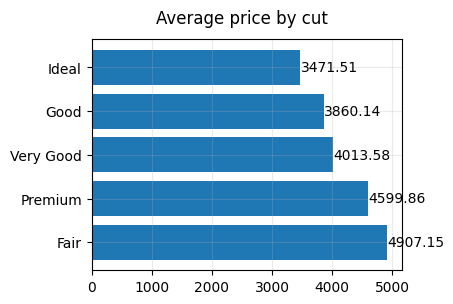

In [104]:

#plt.figure(figsize = (4,3))
#plt.barh('cut','avg_price',data=cut)
fig, ax = plt.subplots()
bars = ax.barh('cut','avg_price',data=cut)
ax.bar_label(bars)
fig.suptitle("Average price by cut")
fig.set_size_inches(4,3)
#ax.tick_params(np.arange(0,5000,250))
ax.grid(alpha=0.25)
fig.show()